# Create Benchmark and Exponential Smoothing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
%load_ext autoreload 
%autoreload 2
import functions as fun
#from sklearn.metrics import negative_log_likelyhood

c:\Users\ABajrami\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\ABajrami\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


,epoch_utc,emission_factor,datetime_de,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,...,DK_import,DK_export,LU_import,LU_export,NL_import,NL_export,PL_import,PL_export,CH_import,CH_export
0,1.546297e+09,298.240217,2018-12-31 23:00:00+00:00,18879.75,5069.00,0.0,28.32,57054.0,61.0,4940.0,...,901.0,0.0,12.0,418.0,0.0,1354.0,224.0,0.0,0.0,800.0
1,1.546301e+09,266.522473,2019-01-01 00:00:00+00:00,20626.50,5042.25,0.0,10.07,57400.0,60.0,5073.0,...,316.0,0.0,16.0,398.0,0.0,1158.0,0.0,0.0,1.0,801.0
2,1.546304e+09,262.594215,2019-01-01 01:00:00+00:00,22355.50,5028.50,0.0,-4.08,57275.0,20.0,4284.0,...,0.0,405.0,19.0,379.0,0.0,1176.0,0.0,0.0,0.0,800.0
3,1.546308e+09,260.190772,2019-01-01 02:00:00+00:00,24032.50,4977.75,0.0,-9.91,58024.0,3.0,4273.0,...,0.0,619.0,23.0,373.0,0.0,1428.0,0.0,0.0,0.0,800.0
4,1.546312e+09,250.496683,2019-01-01 03:00:00+00:00,25452.00,4907.25,0.0,-7.41,59301.0,0.0,4961.0,...,0.0,689.0,27.0,370.0,0.0,1492.0,0.0,0.0,0.0,800.0


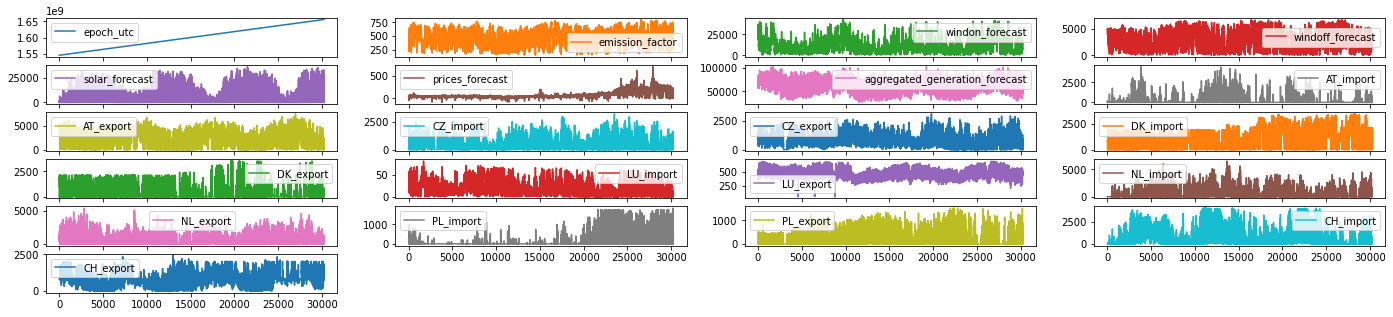

In [ ]:
# # 
# dataset = pd.read_csv('training_data.csv')
# dataset = dataset.drop(['Unnamed: 0'], axis = 1)
# dataset.plot(subplots=True, layout=(14, 4), figsize=(24, 12))
# dataset.head()

In [2]:
dataset = pd.read_csv('target.csv')

In [13]:
features = pd.read_csv('features.csv')
features.head()

,Unnamed: 0,epoch_utc,datetime_de,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,...,day_of_week_mon,day_of_week_sat,day_of_week_sun,day_of_week_thu,day_of_week_tue,day_of_week_wed,hour_of_day_sin,hour_of_day_cos,hour_of_year_sin,hour_of_year_cos
0,0,1.546297e+09,2018-12-31 23:00:00+00:00,18879.75,5069.00,0.0,28.32,57054.0,61.0,4940.0,...,1,0,0,0,0,0,-0.258819,0.965926,-0.000717,1.000000
1,1,1.546301e+09,2019-01-01 00:00:00+00:00,20626.50,5042.25,0.0,10.07,57400.0,60.0,5073.0,...,0,0,0,0,1,0,0.000000,1.000000,0.000000,1.000000
2,2,1.546304e+09,2019-01-01 01:00:00+00:00,22355.50,5028.50,0.0,-4.08,57275.0,20.0,4284.0,...,0,0,0,0,1,0,0.258819,0.965926,0.000717,1.000000
3,3,1.546308e+09,2019-01-01 02:00:00+00:00,24032.50,4977.75,0.0,-9.91,58024.0,3.0,4273.0,...,0,0,0,0,1,0,0.500000,0.866025,0.001435,0.999999
4,4,1.546312e+09,2019-01-01 03:00:00+00:00,25452.00,4907.25,0.0,-7.41,59301.0,0.0,4961.0,...,0,0,0,0,1,0,0.707107,0.707107,0.002152,0.999998


In [4]:
dataset.index = features.datetime_de
dataset['idx'] = features.index

In [5]:
dataset

,Unnamed: 0,emission_factor,idx
datetime_de,,,
2018-12-31 23:00:00+00:00,0,298.240217,0
2019-01-01 00:00:00+00:00,1,266.522473,1
2019-01-01 01:00:00+00:00,2,262.594215,2
2019-01-01 02:00:00+00:00,3,260.190772,3
2019-01-01 03:00:00+00:00,4,250.496683,4
...,...,...,...
2023-03-12 18:00:00+00:00,36763,332.493884,36763
2023-03-12 19:00:00+00:00,36764,317.253111,36764
2023-03-12 20:00:00+00:00,36765,308.394838,36765


In [6]:
dataset_2022 = dataset['2018-12-31 23:00:00+00:00' : '2022-12-31 23:00:00+00:00']
#features_2022 = features['2018-12-31 23:00:00+00:00' : '2022-12-31 23:00:00+00:00']

In [7]:
dataset_2022

,Unnamed: 0,emission_factor,idx
datetime_de,,,
2018-12-31 23:00:00+00:00,0,298.240217,0
2019-01-01 00:00:00+00:00,1,266.522473,1
2019-01-01 01:00:00+00:00,2,262.594215,2
2019-01-01 02:00:00+00:00,3,260.190772,3
2019-01-01 03:00:00+00:00,4,250.496683,4
...,...,...,...
2022-12-31 19:00:00+00:00,35060,195.617034,35060
2022-12-31 20:00:00+00:00,35061,196.523798,35061
2022-12-31 21:00:00+00:00,35062,199.292403,35062


In [9]:
date =pd.to_datetime(features.datetime_de)
date.head()

0   2018-12-31 23:00:00+00:00
1   2019-01-01 00:00:00+00:00
2   2019-01-01 01:00:00+00:00
3   2019-01-01 02:00:00+00:00
4   2019-01-01 03:00:00+00:00
Name: datetime_de, dtype: datetime64[ns, UTC]

In [14]:
co2 = dataset_2022['emission_factor']
co2.index = dataset_2022.idx
cols_features = [c for c in dataset.columns if c != 'emission_factor']
cols = {c: i for i, c in enumerate(dataset.columns)}
indices = {ind: i for i, ind in enumerate(dataset.index)}
#features = dataset.loc[:, [j for j in cols if j != 'emission_factor' and j in cols_features]]

In [16]:
co2
#plt.plot(co2)

idx
0        298.240217
1        266.522473
2        262.594215
3        260.190772
4        250.496683
            ...    
35060    195.617034
35061    196.523798
35062    199.292403
35063    194.357142
35064    150.310416
Name: emission_factor, Length: 35065, dtype: float64

In [12]:
features.head()

,Unnamed: 0,idx
datetime_de,,
2018-12-31 23:00:00+00:00,0,0
2019-01-01 00:00:00+00:00,1,1
2019-01-01 01:00:00+00:00,2,2
2019-01-01 02:00:00+00:00,3,3
2019-01-01 03:00:00+00:00,4,4


#### inspect co2 data and make train, test, val split

In [33]:
co2.describe() 

count    35065.000000
mean       475.324718
std        143.806543
min        150.310416
25%        370.647380
50%        484.372996
75%        587.043152
max        822.653306
Name: emission_factor, dtype: float64

In [17]:
train_ratio = 0.7
val_ratio = 0.9
#test_ratio = 0.1

n = len(co2)
#assert(n == len(features))
co2_train = co2[0:int(n*train_ratio)]
co2_long_train = co2[0:int(n*val_ratio)]
co2_val = co2[int(n*train_ratio):int(n*val_ratio)]
co2_test = co2[int(n*val_ratio):]
co2_test_plot = co2_test.copy()
co2_test_plot.index = co2[:len(co2_test)].index
#assert(len(co2_train) == int(train_ratio*len(features)))

## statsistcal case
co2_stat = co2[0:len(co2)-24]
co2_stat_test = co2[len(co2)-24:]


In [18]:
assert(len(co2_stat_test) == 24)

In [19]:
co2_train.describe()

count    24545.000000
mean       455.275245
std        138.471578
min        150.882862
25%        350.452261
50%        465.222585
75%        565.721724
max        782.462741
Name: emission_factor, dtype: float64

#### create simple average model

In [20]:
simple_average_co2 = fun.simple_average(co2_long_train)
print(simple_average_co2)

467.588911106599


In [21]:
co2_test_simple_average = fun.pred_avg(co2_test, simple_average_co2)
assert (len(co2_test_simple_average) == len(co2_test))

In [23]:
rep_test_simple_avg = fun.evaluation_without_uncertainty(co2_test,co2_test_simple_average, method = 'simple_average')
print(rep_test_simple_avg)

MAE for simple_average: 138.64 g_CO2/kWh
MAPE for simple_average: 29.65 %
RMSE for simple_average: 163.59 g_CO2/kWh
R2 simple_average: 0.0 %


In [24]:
co2_test_simple_average_df = pd.DataFrame(co2_test_simple_average)
co2_test_simple_average_df.index = co2_test.index
co2_test_simple_average_df.head()

,0
idx,
31558,467.588911
31559,467.588911
31560,467.588911
31561,467.588911
31562,467.588911


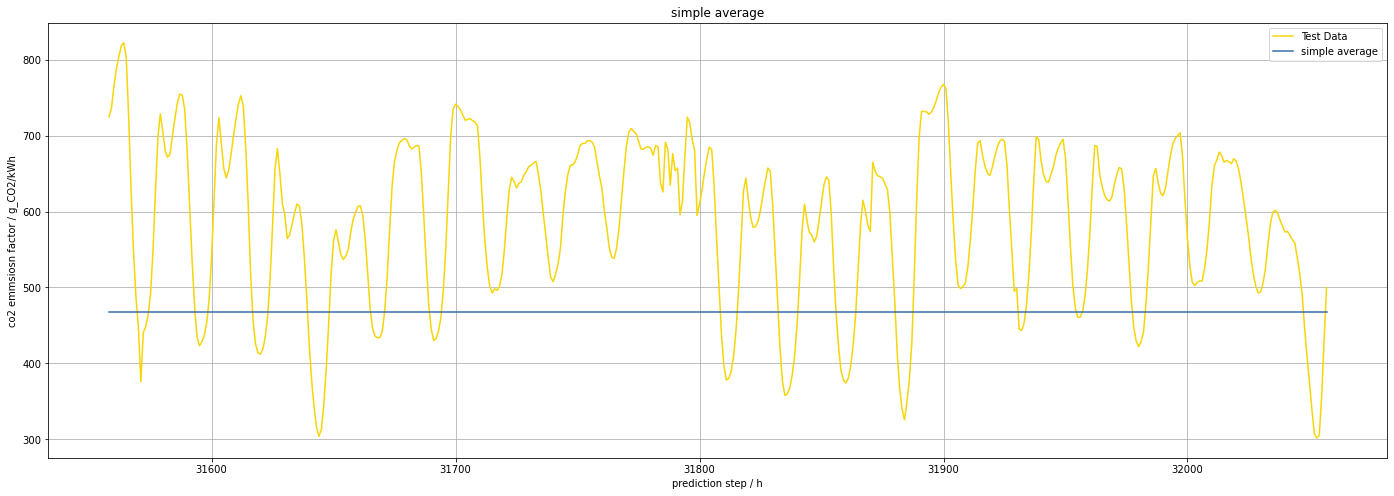

In [25]:
fun.plot_model(co2_test, co2_test_simple_average_df, 0, 500, 'simple average')

### create naive model

In [27]:
naive_co2 = fun.naive(co2_long_train)
#testing
co2_test_naive = fun.naive_forecast(co2_test, co2_long_train)
assert(len(co2_test_naive) == len(co2_test))

In [28]:
rep_naive_test = fun.evaluation_without_uncertainty(co2_test, co2_test_naive, method = 'naive')
print(rep_naive_test)

MAE for naive: 196.99 g_CO2/kWh
MAPE for naive: 26.72 %
RMSE for naive: 240.44 g_CO2/kWh
R2 naive: -1.1182282142874312e+32 %


In [29]:
co2_test_naive_df = pd.DataFrame(co2_test_naive)
co2_test_naive_df.index = co2_test.index
co2_test_naive_df.head()

,0
idx,
31558,737.374616
31559,737.374616
31560,737.374616
31561,737.374616
31562,737.374616


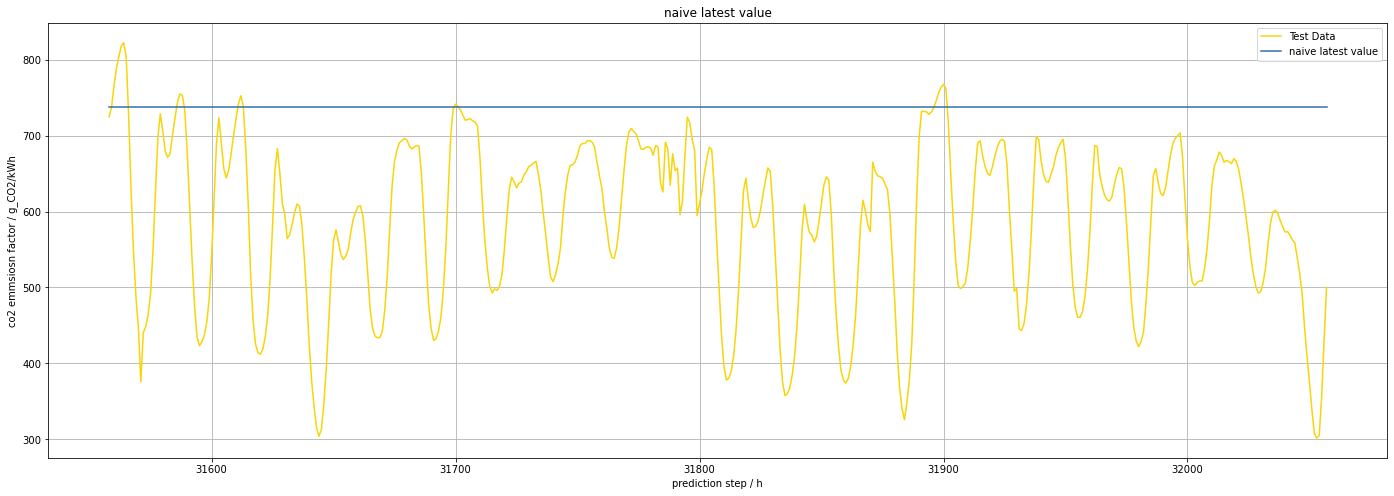

In [30]:
fun.plot_model(co2_test, co2_test_naive_df,0, 500, 'naive latest value')

### Naive 2

In [31]:
co2_naive_2_test = fun.naive_forecast_2(co2_long_train, co2_test)
co2_naive_2_test.index = co2_test.index

In [32]:
rep_naive_test = fun.evaluation_without_uncertainty(co2_test, co2_naive_2_test, method = 'naive_2')
print(rep_naive_test)

MAE for naive_2: 151.6 g_CO2/kWh
MAPE for naive_2: 33.83 %
RMSE for naive_2: 192.0 g_CO2/kWh
R2 naive_2: -98.47 %


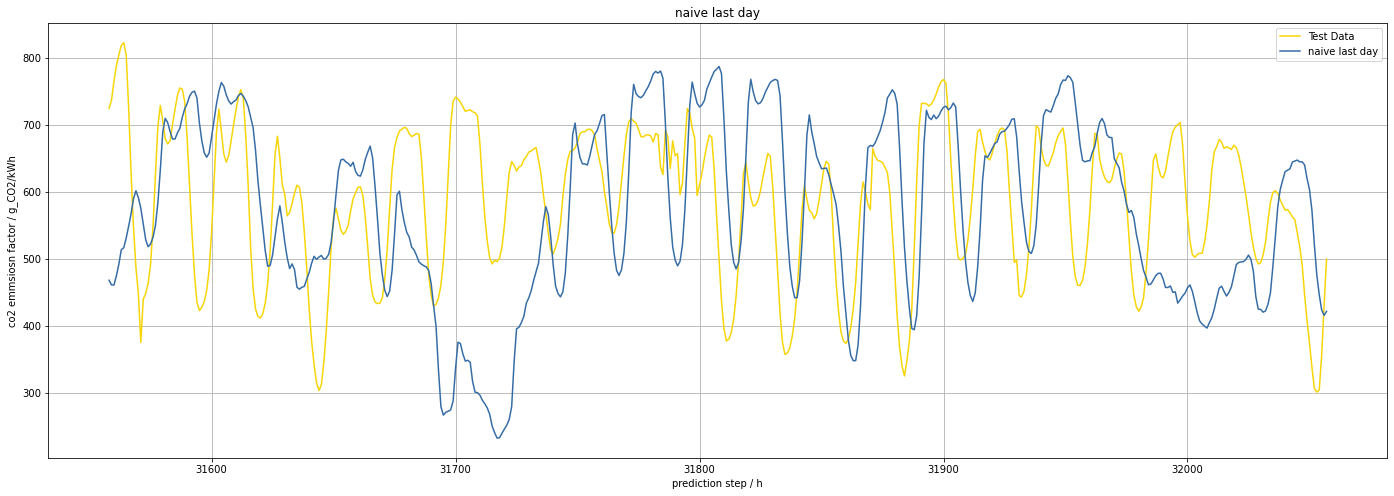

In [33]:
fun.plot_model(co2_test,co2_naive_2_test,0, 500, 'naive last day')

### Simple moving average

In [35]:
forecast_period = 24
sma_window = 12
pred_sma,report_sma = fun.sma_forecast(co2_long_train, co2_test, co2, sma_window, forecast_period)
#assert(len(pred_sma) == len(co2_test))
print(report_sma)

AssertionError: 

In [30]:
co2_test_sma_df = pd.DataFrame(pred_sma)
co2_test_sma_df.index = co2_test.index
co2_test_sma_df.head()

In [35]:
fun.plot_model(test = co2_test,pred = co2_test_sma_df, slice_start = 0, slice_end = 500, method = 'simple moving average')

### Hold Winter

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
co2_date = co2.copy()
co2_date.index = dataset['datetime_de']
#co2_date = pd.DataFrame(dataset['emission_factor']).set_index(dataset['datetime_de'])
decompose_result = seasonal_decompose(co2, model = 'multiplicative',period = 24)
decompose = decompose_result.plot()
decompose.set_size_inches((16, 9))
decompose.tight_layout()
plt.show()

In [ ]:
#o2_hold_winter = ExponentialSmoothing(co2_long_train, seasonal_periods= 24, seasonal = 'mul' )
#co2_hold_winter_fit = co2_hold_winter.fit(optimized= True)
#f = co2_hold_winter_fit.forecast(24)
import scipy.stats as st
model = ExponentialSmoothing(co2_train, seasonal_periods= 24,  seasonal = 'add' )
fit = model.fit()
sim = fit.simulate(8, repetitions=1000, error="mul")
#sim.plot(style="-", alpha=0.05, color="grey", legend=False)
mean = np.mean(sim, axis = 1)
se = st.sem(sim, axis = 1)
print(mean)
#print(se)
#f =fit.forecast(8)
#print(f)
confidence = 0.95
lower,upper = [100*(1-confidence)/2,100*(1-(1-confidence)/2)]
lower,upper = np.percentile(sim,[100*(1-confidence)/2,100*(1-(1-confidence)/2)], axis = 1) 
l = np.quantile(sim,0.025,axis =1)#method = 'lower' )
u = np.quantile(sim,0.975, axis =1)# method = 'higher'  )
#el= mean-l
#eu= mean -u
print(lower)
print(upper)
print(l)
print(u)

In [ ]:
forecast_period = 24
pred_hw,lower_hw,upper_hw,report_hw = fun.walk_forwad_validation_hw(co2_test,co2_train,co2, forecast_period, 0.025, 0.95)
print(report_hw)

In [ ]:
pred_hw_df = pd.DataFrame(pred_hw)
pred_hw_df.index = co2_test_plot.index
pred_hw_df.head()

In [ ]:
#pred_hw

In [ ]:
fun.plot_model_uncertainty(co2_test_plot, pred_hw_df,lower_hw, upper_hw, 100, 500, 'expoential smoothing')